In [1]:
from pprint import pprint
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress


C:\Users\lamot\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read saved data
amzn_clean_df = pd.read_csv("Resources/amzn_clean_df.csv", index_col="Amzn_ID")

# Display sample data
amzn_clean_df.head()

,Date,transaction count,volume,volume weighted average price,open,close,high,low
Amzn_ID,,,,,,,,
0,2020-01-02,102920,4035910.0,1882.8283,1875.00,1898.01,1898.0100,1864.1500
1,2020-01-03,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
2,2020-01-06,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
3,2020-01-07,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
4,2020-01-08,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448


In [3]:
##Converting the date to datetime64
amzn_clean_df['Date']= pd.to_datetime(amzn_clean_df['Date'], format='%Y-%m-%d')

In [4]:
filtered_2020_df = amzn_clean_df.loc[(amzn_clean_df['Date']>='2020-01-02')
                                          & (amzn_clean_df['Date']<'2021-04-19')]




In [5]:
filtered_2020_df

,Date,transaction count,volume,volume weighted average price,open,close,high,low
Amzn_ID,,,,,,,,
0,2020-01-02,102920,4035910.0,1882.8283,1875.000,1898.01,1898.0100,1864.1500
1,2020-01-03,99633,3766604.0,1875.4284,1864.500,1874.97,1886.1965,1864.5000
2,2020-01-06,104160,4065698.0,1891.9954,1860.000,1902.88,1903.6900,1860.0000
3,2020-01-07,98636,4134010.0,1903.2183,1904.500,1906.86,1913.8900,1892.0433
4,2020-01-08,95706,3511966.0,1900.4983,1898.040,1891.97,1910.9999,1886.4448
...,...,...,...,...,...,...,...,...
320,2021-04-12,154354,3281798.0,3375.3129,3355.210,3379.39,3395.0400,3351.1500
321,2021-04-13,173494,3300837.0,3414.6571,3400.845,3400.00,3432.0000,3395.6300
322,2021-04-14,177490,3135204.0,3354.9255,3404.040,3333.00,3404.1300,3326.0000


In [6]:
filtered_monday_2020_df = filtered_2020_df.loc[filtered_2020_df['Date'].dt.weekday == 0]
#filtered_monday_2020_df = filtered_2020_df[filtered_2020_df.loc[filtered_2020_df['Date'].dt.weekday == 1]]

In [7]:
filtered_monday_2020_df

,Date,transaction count,volume,volume weighted average price,open,close,high,low
Amzn_ID,,,,,,,,
2,2020-01-06,104160,4065698.0,1891.9954,1860.0000,1902.88,1903.690,1860.000
7,2020-01-13,78771,2785844.0,1890.9052,1891.3100,1891.30,1898.000,1880.800
16,2020-01-27,94786,3528509.0,1831.2442,1820.0000,1828.34,1841.000,1815.340
21,2020-02-03,157552,5899094.0,2023.4539,2010.6000,2004.20,2048.500,2000.250
26,2020-02-10,135564,5056196.0,2122.0813,2085.0100,2133.91,2135.600,2084.960
...,...,...,...,...,...,...,...,...
301,2021-03-15,164272,2918592.0,3059.6054,3074.5700,3081.68,3082.240,3032.090
306,2021-03-22,148669,2902179.0,3108.2449,3067.8500,3110.87,3126.580,3060.050
311,2021-03-29,140592,2735468.0,3066.3924,3055.4394,3075.73,3091.250,3028.445


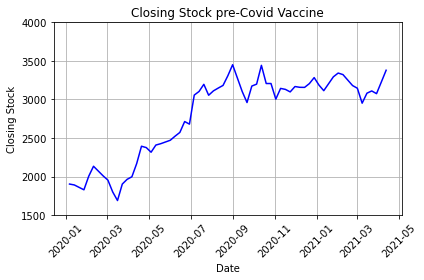

In [29]:

# YOUR CODE HERE
#plt.plot(filtered_monday_2020_df['Date'],filtered_monday_2020_df['close'],s=20,c='b',edgecolors='black',alpha=.75)
plt.plot(filtered_monday_2020_df['Date'],filtered_monday_2020_df['close'],c='b')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Closing Stock pre-Covid Vaccine')
plt.ylabel('Closing Stock')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim(1500,4000)
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("pre_vacc.png")

# Show plot
plt.show()

In [9]:
filtered_2021_df = amzn_clean_df.loc[(amzn_clean_df['Date']>='2021-04-19')
                                          & (amzn_clean_df['Date']<'2022-01-01')]




In [10]:
filtered_2021_df

,Date,transaction count,volume,volume weighted average price,open,close,high,low
Amzn_ID,,,,,,,,
325,2021-04-19,148916,2725405.0,3385.8229,3390.33,3372.01,3435.9333,3360.1600
326,2021-04-20,143655,2623032.0,3339.6960,3373.60,3334.69,3382.9900,3316.0000
327,2021-04-21,121428,2210945.0,3344.1990,3316.00,3362.02,3362.8600,3303.8061
328,2021-04-22,141914,2576950.0,3334.7739,3371.68,3309.04,3372.8700,3301.4500
329,2021-04-23,136899,3196612.0,3345.6811,3319.10,3340.88,3375.0000,3308.5000
...,...,...,...,...,...,...,...,...
500,2021-12-27,198803,2942341.0,3409.6299,3420.74,3393.39,3458.8600,3384.3100
501,2021-12-28,161457,2733628.0,3415.2458,3403.65,3413.22,3443.5176,3382.7100
502,2021-12-29,131064,1787702.0,3387.5379,3416.80,3384.02,3424.2400,3372.0101


In [11]:
filtered_monday_2021_df = filtered_2021_df.loc[filtered_2021_df['Date'].dt.weekday == 0]

In [12]:
filtered_monday_2021_df

,Date,transaction count,volume,volume weighted average price,open,close,high,low
Amzn_ID,,,,,,,,
325,2021-04-19,148916,2725405.0,3385.8229,3390.3300,3372.01,3435.9333,3360.1600
330,2021-04-26,229396,4880708.0,3390.1659,3348.0000,3409.00,3428.4500,3330.9400
335,2021-05-03,270975,5815530.0,3417.4463,3484.7300,3386.49,3486.6450,3372.7012
340,2021-05-10,270467,5828603.0,3219.0879,3282.3200,3190.49,3283.0000,3190.0000
345,2021-05-17,174135,3723925.0,3265.4482,3245.9300,3270.39,3292.7500,3234.5900
350,2021-05-24,123767,2412813.0,3243.6430,3215.5000,3244.99,3257.9500,3210.4993
359,2021-06-07,140751,2215756.0,3193.5769,3197.3300,3198.01,3208.0000,3172.2000
364,2021-06-14,117442,2554655.0,3370.3631,3346.8300,3383.87,3385.0000,3335.5000
369,2021-06-21,165091,3270890.0,3459.7152,3476.4200,3453.96,3482.0000,3434.0000


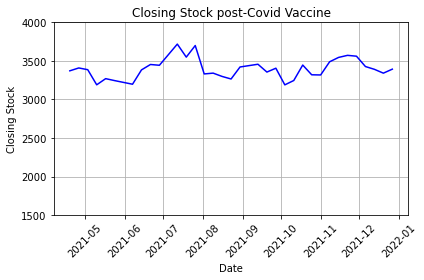

In [30]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
#plt.plot(filtered_monday_2021_df['Date'],filtered_monday_2021_df['close'],s=20,c='b',edgecolors='black',alpha=.75)
plt.plot(filtered_monday_2021_df['Date'],filtered_monday_2021_df['close'],c='b')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Closing Stock post-Covid Vaccine')
plt.ylabel('Closing Stock')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim(1500,4000)
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("post_vacc.png")

# Show plot
plt.show()